Proviamo a costruire un NN che fitti la funzione $4-3x-2x^2+3x^3$ in $x\in[-1,1]$ sperimentando diverse disposizioni di neuroni e parametri del trainning e dei dati

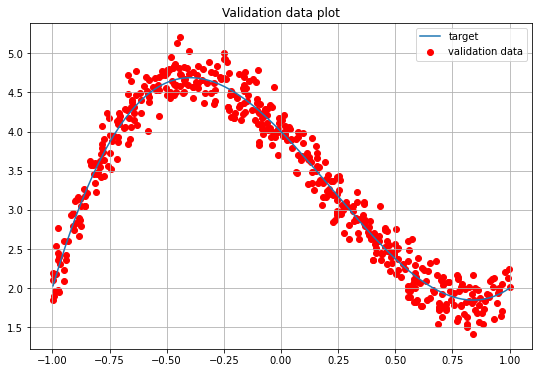

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def pol(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

#target line parameters y=3x^3-2x^2-3x+4
a = 3 
b = -2
c = -3
d = 4

# generate a Dataset
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = pol(x_valid,a,b,c,d) # ideal (target) function

sigma = 0.2#gaussian noise standard deviation
y_train = np.random.normal(pol(x_train,a,b,c,d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(pol(x_valid,a,b,c,d), sigma)

# plot validation and target dataset
plt.figure(figsize=(9,6))
plt.title('Validation data plot')
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
#now, we create the model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(4,input_shape=(1,),activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
____________________________________________________________

In [3]:
#now we train the model
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
#par = model.get_weights() #m, b
#print('------PARAMETERS------\n',par,'\n')

# evaluate model - with validation data
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with validation data---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model - with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('---Evaluation with the exact curve---\n','Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/80
157/157 [==============================] - 1s 4ms/step - loss: 0.9553 - mse: 0.9553 - val_loss: 0.4742 - val_mse: 0.4742
Epoch 2/80
157/157 [==============================] - 0s 2ms/step - loss: 0.3563 - mse: 0.3563 - val_loss: 0.2719 - val_mse: 0.2719
Epoch 3/80
157/157 [==============================] - 0s 2ms/step - loss: 0.1859 - mse: 0.1859 - val_loss: 0.1470 - val_mse: 0.1470
Epoch 4/80
157/157 [==============================] - 0s 2ms/step - loss: 0.0980 - mse: 0.0980 - val_loss: 0.0815 - val_mse: 0.0815
Epoch 5/80
157/157 [==============================] - 0s 2ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 6/80
157/157 [==============================] - 0s 2ms/step - loss: 0.0555 - mse: 0.0555 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 7/80
157/157 [==============================] - 0s 2ms/step - loss: 0.0490 - mse: 0.0490 - val_loss: 0.0574 - val_mse: 0.0574
Epoch 8/80
157/157 [==============================] - 0s 2ms/step - loss: 0.

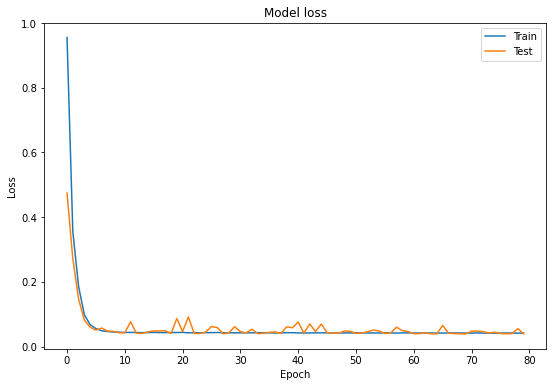

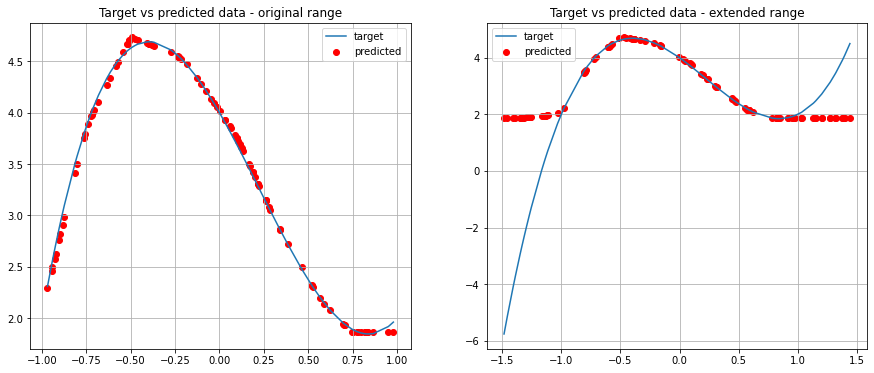

In [4]:
# Plot training & validation loss values over time
plt.figure(figsize=(9,6))
plt.title('Loss function over time')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#make predictions
x_predicted = np.random.uniform(-1., 1., 100)
x_predicted_ext = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
x_predicted_ext.sort()
y_predicted = model.predict(x_predicted)
y_predicted_ext = model.predict(x_predicted_ext)

#print prediction vs target
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Target vs predicted data - original range')
plt.scatter(x_predicted, y_predicted,color='r',label='predicted')
plt.plot(x_predicted, pol(x_predicted,a,b,c,d),label='target')
plt.grid(True)
plt.legend()
plt.subplot(122)
plt.title('Target vs predicted data - extended range')
plt.scatter(x_predicted_ext, y_predicted_ext,color='r',label='predicted')
plt.plot(x_predicted_ext, pol(x_predicted_ext,a,b,c,d),label='target')
plt.grid(True)
plt.legend()
plt.show()